# Loading and Understanding the dataset


In [308]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-6-0/sample_submission_storming_round.csv
/kaggle/input/data-storm-6-0/train_storming_round.csv
/kaggle/input/data-storm-6-0/test_storming_round.csv


In [309]:
train = pd.read_csv('/kaggle/input/data-storm-6-0/train_storming_round.csv')
test = pd.read_csv('/kaggle/input/data-storm-6-0/test_storming_round.csv')

In [310]:
train

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies
0,1,455ca878,45,2/1/2021,9/1/2023,1/1/2023,3,6,2,12,...,9,3,4,8,15,0,0,93313,30,162
1,2,c823ce77,48,4/1/2022,2/1/2024,1/1/2023,1,4,12,21,...,14,4,3,10,17,25,1071450,164804,0,175
2,3,62154055,53,5/1/2020,9/1/2023,1/1/2023,3,5,5,17,...,14,3,7,11,21,26,1601210,426690,84,78
3,4,c58bfa6e,44,7/1/2019,3/1/2022,1/1/2023,1,0,12,17,...,11,2,2,9,13,18,283230,47793,39,144
4,5,b1e5f770,20,9/1/2020,2/1/2023,1/1/2023,0,6,10,17,...,13,3,10,6,19,20,1957680,562239,19,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15303,15304,d3b44e44,43,4/1/2019,10/1/2023,8/1/2024,1,6,6,17,...,10,3,4,11,18,25,2473900,404980,18,100
15304,15305,0b1d7054,28,9/1/2022,3/1/2024,8/1/2024,1,5,3,13,...,14,4,3,11,18,15,922050,198187,18,120
15305,15306,51321fa2,45,1/1/2021,4/1/2024,8/1/2024,0,6,17,26,...,22,6,7,6,19,30,645330,133263,57,270
15306,15307,dd4a0d2d,25,12/1/2021,12/1/2023,8/1/2024,0,4,6,14,...,13,6,3,6,15,0,0,32546,30,171


In [311]:
describe = pd.DataFrame(index=train.columns.to_list())
describe['data type'] = train.dtypes
describe['count'] = train.count()
describe['unique'] = train.nunique()
describe['null'] = train.isnull().sum()
describe

,data type,count,unique,null
row_id,int64,15308,15308,0
agent_code,object,15308,905,0
agent_age,int64,15308,41,0
agent_join_month,object,15308,64,0
first_policy_sold_month,object,15308,28,0
year_month,object,15308,20,0
unique_proposals_last_7_days,int64,15308,4,0
unique_proposals_last_15_days,int64,15308,7,0
unique_proposals_last_21_days,int64,15308,21,0
unique_proposal,int64,15308,34,0


In [312]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   row_id                           15308 non-null  int64 
 1   agent_code                       15308 non-null  object
 2   agent_age                        15308 non-null  int64 
 3   agent_join_month                 15308 non-null  object
 4   first_policy_sold_month          15308 non-null  object
 5   year_month                       15308 non-null  object
 6   unique_proposals_last_7_days     15308 non-null  int64 
 7   unique_proposals_last_15_days    15308 non-null  int64 
 8   unique_proposals_last_21_days    15308 non-null  int64 
 9   unique_proposal                  15308 non-null  int64 
 10  unique_quotations_last_7_days    15308 non-null  int64 
 11  unique_quotations_last_15_days   15308 non-null  int64 
 12  unique_quotations_last_21_days  

# Cleaning and preprocessing data


In [313]:
# Checking for null values
train.isnull().sum()


row_id                             0
agent_code                         0
agent_age                          0
agent_join_month                   0
first_policy_sold_month            0
year_month                         0
unique_proposals_last_7_days       0
unique_proposals_last_15_days      0
unique_proposals_last_21_days      0
unique_proposal                    0
unique_quotations_last_7_days      0
unique_quotations_last_15_days     0
unique_quotations_last_21_days     0
unique_quotations                  0
unique_customers_last_7_days       0
unique_customers_last_15_days      0
unique_customers_last_21_days      0
unique_customers                   0
new_policy_count                   0
ANBP_value                         0
net_income                         0
number_of_policy_holders           0
number_of_cash_payment_policies    0
dtype: int64

In [314]:
#Checking for duplicates
duplicates = train[train.duplicated()]
duplicates

,row_id,agent_code,agent_age,agent_join_month,first_policy_sold_month,year_month,unique_proposals_last_7_days,unique_proposals_last_15_days,unique_proposals_last_21_days,unique_proposal,...,unique_quotations,unique_customers_last_7_days,unique_customers_last_15_days,unique_customers_last_21_days,unique_customers,new_policy_count,ANBP_value,net_income,number_of_policy_holders,number_of_cash_payment_policies


In [315]:
#converting date columns
date_cols = ['agent_join_month', 'first_policy_sold_month', 'year_month']
for col in date_cols:
    train[col] = pd.to_datetime(train[col], format='%m/%d/%Y')

## Handling outliers
We used **box plots** to visually inspect outliers for key numeric features. Points beyond the whiskers represent potential outliers.

Although outliers are present in the dataset, they likely reflect real fluctuations in agent performance (**behavioral variations**) rather than data errors. Therefore, we **do not remove outliers**. Instead, we introduce a new feature as **"***anomaly_count***"** to capture and monitor these variations in a way that supports meaningful analysis.

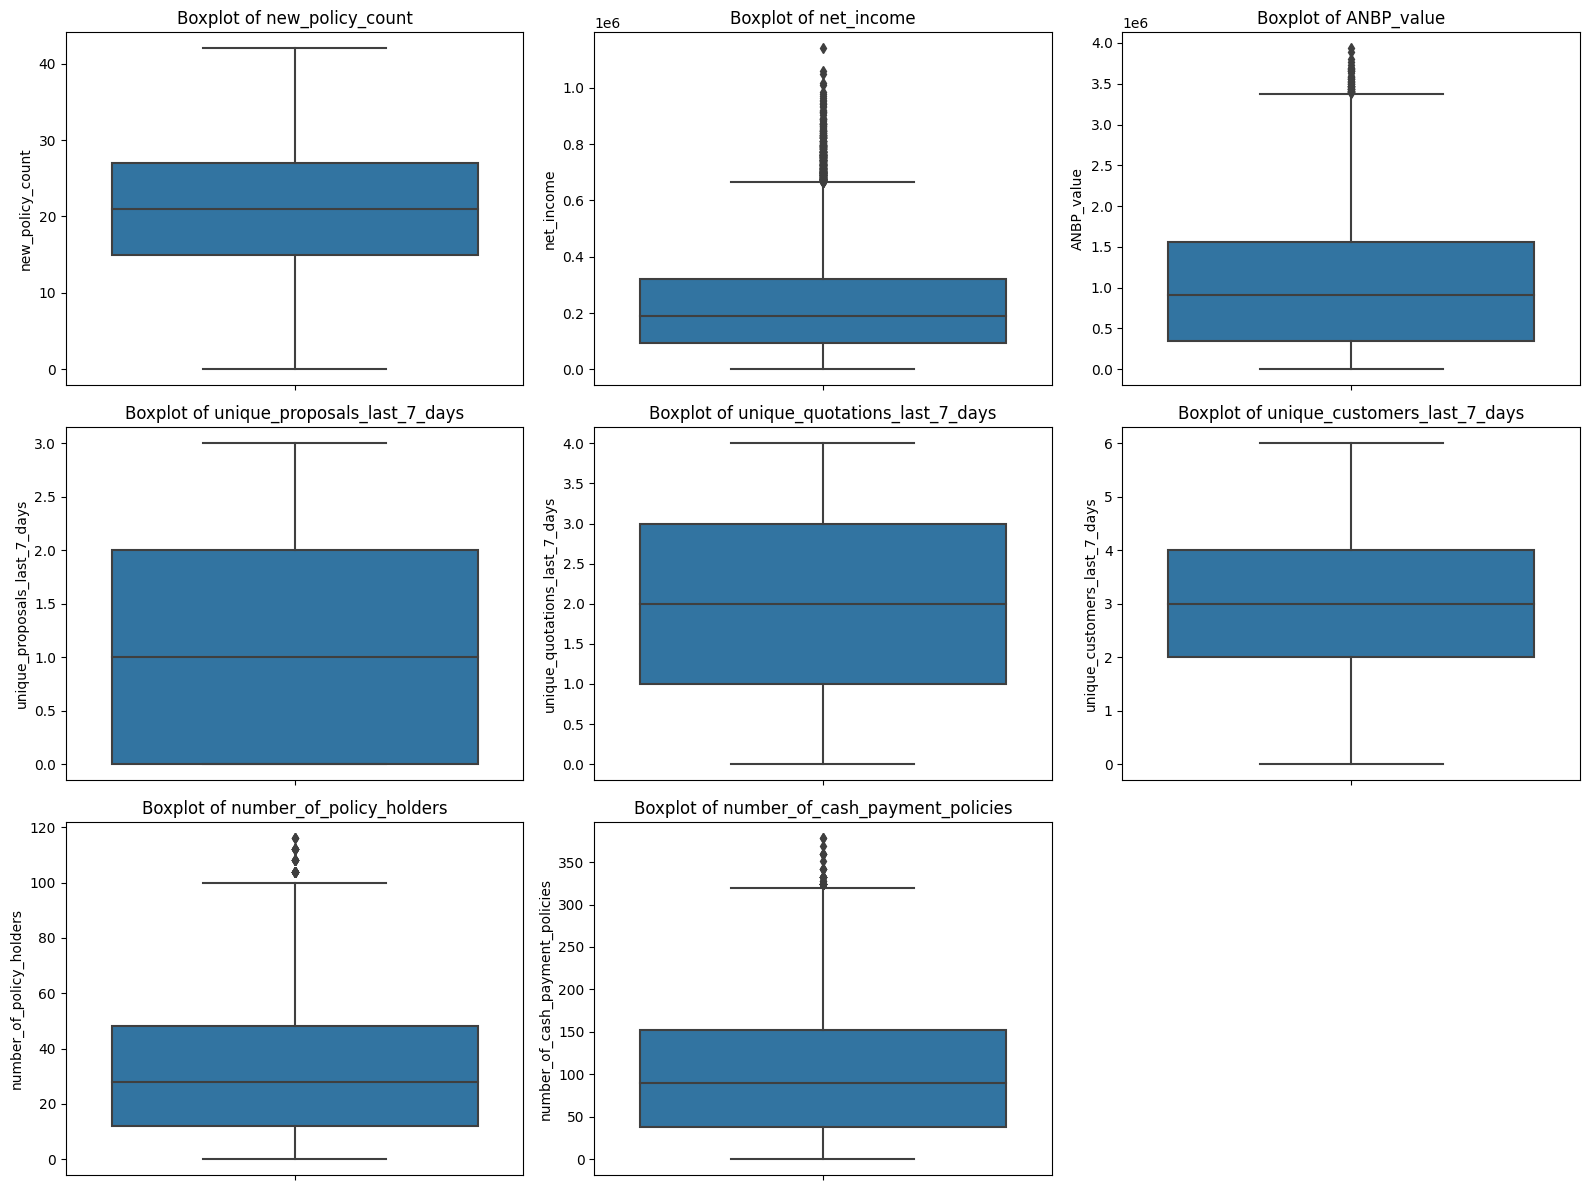

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = [
    'new_policy_count',
    'net_income',
    'ANBP_value',
    'unique_proposals_last_7_days',
    'unique_quotations_last_7_days',
    'unique_customers_last_7_days',
    'number_of_policy_holders',
    'number_of_cash_payment_policies'
]

# Plot boxplots
plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=train[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

Before aggregating data at the agent level, we examined how many months of data are available per agent. This helps ensure fair comparisons, as agents with fewer records may not reflect stable performance trends.

In [317]:
record_count_per_agent = train['agent_code'].value_counts()

record_count_distribution = record_count_per_agent.value_counts().sort_index()

record_count_per_agent_df = pd.DataFrame({
    'record_count': record_count_distribution.index,
    'number_of_agents': record_count_distribution.values
})

record_count_per_agent_df

,record_count,number_of_agents
0,1,13
1,2,21
2,3,20
3,4,9
4,5,20
5,6,16
6,7,14
7,8,17
8,9,12
9,10,8


In [318]:
number_of_agents = len(train['agent_code'].unique())

number_of_agents_who_have_20_records = record_count_per_agent_df.iloc[19, 1]

(number_of_agents_who_have_20_records / number_of_agents) * 100

71.8232044198895

# Aggregating agent-level data
To perform clustering, we aggregate the dataset so that each agent is represented by a single row summarizing their average performance and behavior.

In [319]:
agent_summary = train.groupby('agent_code').agg({
    'agent_age': 'first',  # Agent demographic (doesn't change)
    
    'new_policy_count': ['mean', 'sum'],
    'ANBP_value': 'mean',
    'net_income': 'mean',
    
    'number_of_policy_holders': 'last',
    'number_of_cash_payment_policies': 'mean',

    'unique_proposals_last_7_days': 'mean',
    'unique_proposals_last_15_days': 'mean',
    'unique_proposals_last_21_days': 'mean',
    'unique_proposal': 'mean',

    'unique_quotations_last_7_days': 'mean',
    'unique_quotations_last_15_days': 'mean',
    'unique_quotations_last_21_days': 'mean',
    'unique_quotations': 'mean',

    'unique_customers_last_7_days': 'mean',
    'unique_customers_last_15_days': 'mean',
    'unique_customers_last_21_days': 'mean',
    'unique_customers': 'mean'
}).reset_index()

In [320]:
# Flatten multi-level column names
agent_summary.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col 
                         for col in agent_summary.columns]

In [321]:
agent_summary

,agent_code,agent_age_first,new_policy_count_mean,new_policy_count_sum,ANBP_value_mean,net_income_mean,number_of_policy_holders_last,number_of_cash_payment_policies_mean,unique_proposals_last_7_days_mean,unique_proposals_last_15_days_mean,unique_proposals_last_21_days_mean,unique_proposal_mean,unique_quotations_last_7_days_mean,unique_quotations_last_15_days_mean,unique_quotations_last_21_days_mean,unique_quotations_mean,unique_customers_last_7_days_mean,unique_customers_last_15_days_mean,unique_customers_last_21_days_mean,unique_customers_mean
0,003c1999,35,22.40,448,1268787.95,278643.45,54,118.15,1.60,3.20,11.05,18.95,2.05,2.85,4.90,14.90,2.95,4.80,8.15,15.90
1,00d5bda3,48,20.25,405,885509.80,213111.60,15,102.90,1.70,2.90,12.45,19.75,2.10,3.00,4.35,13.75,2.95,5.55,6.85,15.35
2,012a3553,25,18.10,362,944373.70,204776.35,0,91.15,1.50,2.95,9.40,16.45,2.35,3.55,4.25,13.90,3.30,5.65,6.80,15.75
3,012f0e15,31,19.65,393,875913.10,225369.70,15,96.10,1.80,3.30,9.90,17.95,1.95,2.55,4.70,13.80,2.90,4.65,8.00,15.55
4,0177ed5f,46,21.25,425,1067276.60,229649.50,6,85.55,1.25,3.05,9.05,16.55,1.65,3.05,4.95,13.35,2.60,4.85,7.70,15.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,ff8edcc9,56,21.40,428,1168878.25,246696.85,48,90.95,1.60,3.20,10.60,18.35,2.00,2.85,4.50,13.20,2.80,4.35,7.65,14.80
901,ff955d18,54,13.00,26,1160614.00,333061.50,68,91.00,0.50,5.00,13.00,22.50,2.00,2.00,7.00,20.50,2.00,3.50,10.50,16.00
902,ffca3177,52,20.65,413,1211548.65,225084.95,57,125.15,1.80,2.40,9.50,16.95,2.30,2.15,5.35,14.60,3.25,3.95,8.75,15.95
903,ffe6c9e9,54,19.55,391,835692.15,212448.80,44,111.80,1.35,2.35,9.65,16.20,1.50,2.55,4.30,13.55,2.70,4.35,6.25,13.30


In [322]:
agent_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   agent_code                            905 non-null    object 
 1   agent_age_first                       905 non-null    int64  
 2   new_policy_count_mean                 905 non-null    float64
 3   new_policy_count_sum                  905 non-null    int64  
 4   ANBP_value_mean                       905 non-null    float64
 5   net_income_mean                       905 non-null    float64
 6   number_of_policy_holders_last         905 non-null    int64  
 7   number_of_cash_payment_policies_mean  905 non-null    float64
 8   unique_proposals_last_7_days_mean     905 non-null    float64
 9   unique_proposals_last_15_days_mean    905 non-null    float64
 10  unique_proposals_last_21_days_mean    905 non-null    float64
 11  unique_proposal_mea

In [323]:
describe = pd.DataFrame(index=agent_summary.columns.to_list())
describe['data type'] = agent_summary.dtypes
describe['count'] = agent_summary.count()
describe['unique'] = agent_summary.nunique()
describe['null'] = agent_summary.isnull().sum()
describe

,data type,count,unique,null
agent_code,object,905,905,0
agent_age_first,int64,905,41,0
new_policy_count_mean,float64,905,338,0
new_policy_count_sum,int64,905,338,0
ANBP_value_mean,float64,905,905,0
net_income_mean,float64,905,905,0
number_of_policy_holders_last,int64,905,65,0
number_of_cash_payment_policies_mean,float64,905,714,0
unique_proposals_last_7_days_mean,float64,905,112,0
unique_proposals_last_15_days_mean,float64,905,159,0


# Feature Engineeeing 

## Performance Slope
This feature captures the trend in each agent’s policy sales over time using linear regression. A positive slope indicates improvement, while a negative slope suggests declining performance.

In [324]:
from sklearn.linear_model import LinearRegression
import numpy as np

agent_trends = []

for agent, group in train.groupby('agent_code'):
    group = group.sort_values('year_month')
    
    X = np.arange(len(group)).reshape(-1, 1)
    
    y = group['new_policy_count'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    slope = model.coef_[0]
    
    agent_trends.append({'agent_code': agent, 'performance_slope': slope})

In [325]:
trend_df = pd.DataFrame(agent_trends)

agent_summary = agent_summary.merge(trend_df, on='agent_code')

## Anomaly Count
This feature represents the total number of months where an agent’s performance significantly deviated from their typical pattern, based on a threshold of ±2 standard deviations.

In [326]:
import pandas as pd

# Features to check for anomalies
anomaly_features = [
    'new_policy_count',
    'ANBP_value',
    'net_income',
    'unique_proposals_last_7_days',
    'unique_quotations_last_7_days',
    'unique_customers_last_7_days',
    'number_of_policy_holders',
    'number_of_cash_payment_policies'
]

anomaly_threshold = 2  
agent_anomaly_counts = []

for agent, group in train.groupby('agent_code'):
    count = 0  

    for feature in anomaly_features:
        mean = group[feature].mean()
        std = group[feature].std()

        if std == 0 or pd.isna(std):
            continue  

        anomalies = group[
            (group[feature] > mean + anomaly_threshold * std) |
            (group[feature] < mean - anomaly_threshold * std)
        ]

        count += len(anomalies)

    agent_anomaly_counts.append({'agent_code': agent, 'anomaly_count': count})

In [327]:
anomaly_df = pd.DataFrame(agent_anomaly_counts)
agent_summary = agent_summary.merge(anomaly_df, on='agent_code')

In [328]:
agent_summary

,agent_code,agent_age_first,new_policy_count_mean,new_policy_count_sum,ANBP_value_mean,net_income_mean,number_of_policy_holders_last,number_of_cash_payment_policies_mean,unique_proposals_last_7_days_mean,unique_proposals_last_15_days_mean,...,unique_quotations_last_7_days_mean,unique_quotations_last_15_days_mean,unique_quotations_last_21_days_mean,unique_quotations_mean,unique_customers_last_7_days_mean,unique_customers_last_15_days_mean,unique_customers_last_21_days_mean,unique_customers_mean,performance_slope,anomaly_count
0,003c1999,35,22.40,448,1268787.95,278643.45,54,118.15,1.60,3.20,...,2.05,2.85,4.90,14.90,2.95,4.80,8.15,15.90,0.427068,5
1,00d5bda3,48,20.25,405,885509.80,213111.60,15,102.90,1.70,2.90,...,2.10,3.00,4.35,13.75,2.95,5.55,6.85,15.35,-0.181203,4
2,012a3553,25,18.10,362,944373.70,204776.35,0,91.15,1.50,2.95,...,2.35,3.55,4.25,13.90,3.30,5.65,6.80,15.75,0.436090,4
3,012f0e15,31,19.65,393,875913.10,225369.70,15,96.10,1.80,3.30,...,1.95,2.55,4.70,13.80,2.90,4.65,8.00,15.55,0.272932,2
4,0177ed5f,46,21.25,425,1067276.60,229649.50,6,85.55,1.25,3.05,...,1.65,3.05,4.95,13.35,2.60,4.85,7.70,15.15,-0.125564,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,ff8edcc9,56,21.40,428,1168878.25,246696.85,48,90.95,1.60,3.20,...,2.00,2.85,4.50,13.20,2.80,4.35,7.65,14.80,0.067669,5
901,ff955d18,54,13.00,26,1160614.00,333061.50,68,91.00,0.50,5.00,...,2.00,2.00,7.00,20.50,2.00,3.50,10.50,16.00,-26.000000,0
902,ffca3177,52,20.65,413,1211548.65,225084.95,57,125.15,1.80,2.40,...,2.30,2.15,5.35,14.60,3.25,3.95,8.75,15.95,0.367669,6
903,ffe6c9e9,54,19.55,391,835692.15,212448.80,44,111.80,1.35,2.35,...,1.50,2.55,4.30,13.55,2.70,4.35,6.25,13.30,0.095489,5


# Preprocessing for Clustering

In [329]:
features = agent_summary.drop(columns=['agent_code'])

## Correlation Heatmap
We used a correlation heatmap to identify redundant or weakly related features before clustering. This helps in selecting the most informative features.

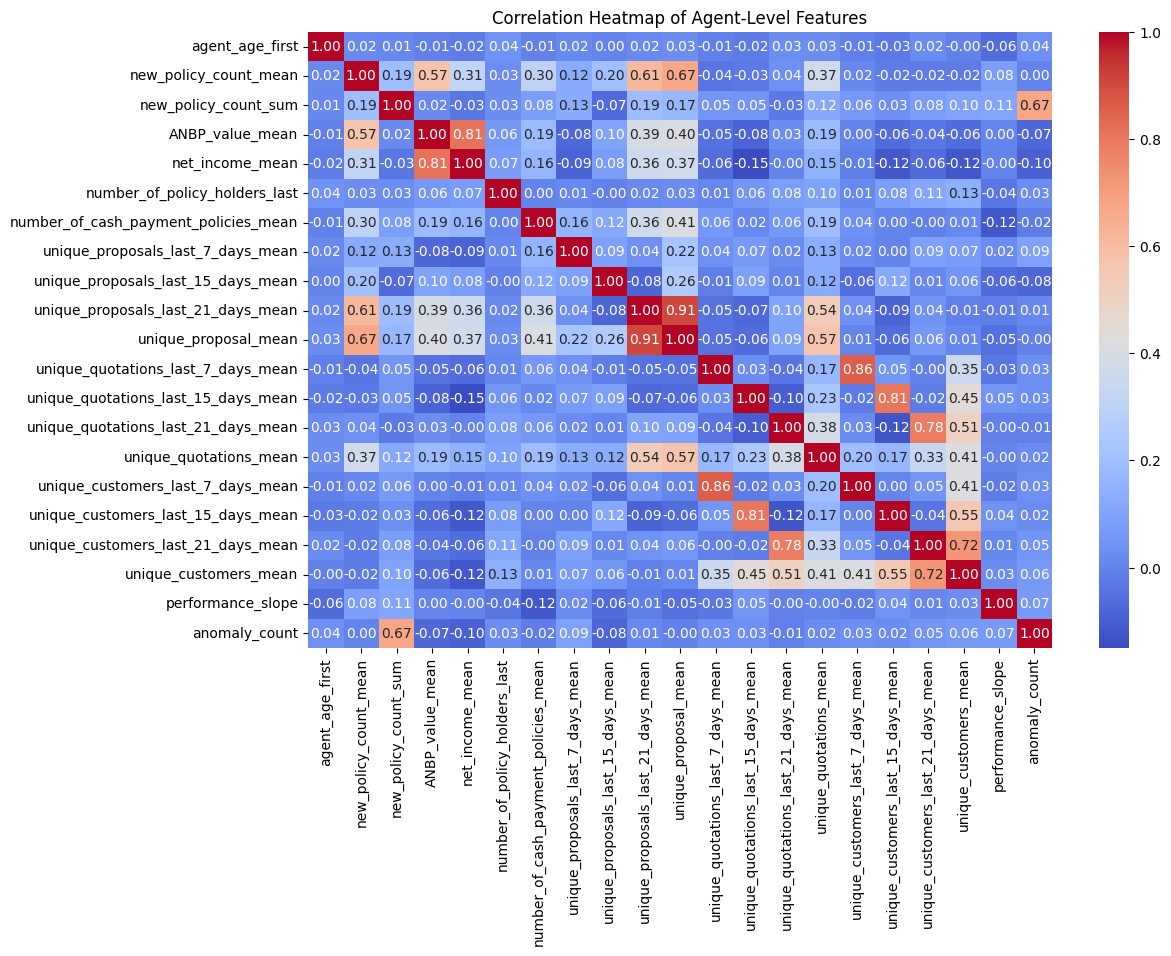

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute and plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(features.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Agent-Level Features")
plt.show()

There were no strong correlations among the features, so none were dropped from the dataset.

In [331]:
# features.drop(columns=[
#     'unique_proposals_last_7_days_mean',
#     'unique_proposals_last_15_days_mean',
#     'unique_proposals_last_21_days_mean',
#     'unique_quotations_last_7_days_mean',
#     'unique_quotations_last_15_days_mean',
#     'unique_quotations_last_21_days_mean',
#     'unique_customers_last_7_days_mean',
#     'unique_customers_last_15_days_mean',
#     'unique_customers_last_21_days_mean'
# ], inplace=True)

## Standardizing the features

In [332]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering
Applying **KMeans clustering** to categorize agents based on performance patterns.

In [333]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
features['performance_cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [334]:
features.groupby('performance_cluster').mean()

,agent_age_first,new_policy_count_mean,new_policy_count_sum,ANBP_value_mean,net_income_mean,number_of_policy_holders_last,number_of_cash_payment_policies_mean,unique_proposals_last_7_days_mean,unique_proposals_last_15_days_mean,unique_proposals_last_21_days_mean,...,unique_quotations_last_7_days_mean,unique_quotations_last_15_days_mean,unique_quotations_last_21_days_mean,unique_quotations_mean,unique_customers_last_7_days_mean,unique_customers_last_15_days_mean,unique_customers_last_21_days_mean,unique_customers_mean,performance_slope,anomaly_count
performance_cluster,,,,,,,,,,,,,,,,,,,,,
0,39.634551,18.794983,307.634551,9.156697e+05,205879.110432,24.338870,93.918366,1.451111,2.936014,8.783415,...,1.872887,2.836076,4.070763,12.812139,2.833177,4.825946,6.961660,14.620783,-0.198428,2.976744
1,41.391549,19.928698,355.769014,9.945897e+05,222454.901401,38.174648,99.510428,1.459487,2.987342,9.915408,...,2.100392,3.156922,4.927516,14.396949,3.137995,5.185907,8.078741,16.402644,-0.102996,3.464789
2,40.477912,22.790344,367.056225,1.242403e+06,270152.481874,29.493976,112.058557,1.543924,3.157477,11.663802,...,1.943377,2.923729,4.319004,14.539658,2.955172,4.907699,7.221313,15.084184,0.110445,2.971888


## PCA Visualization of clusters

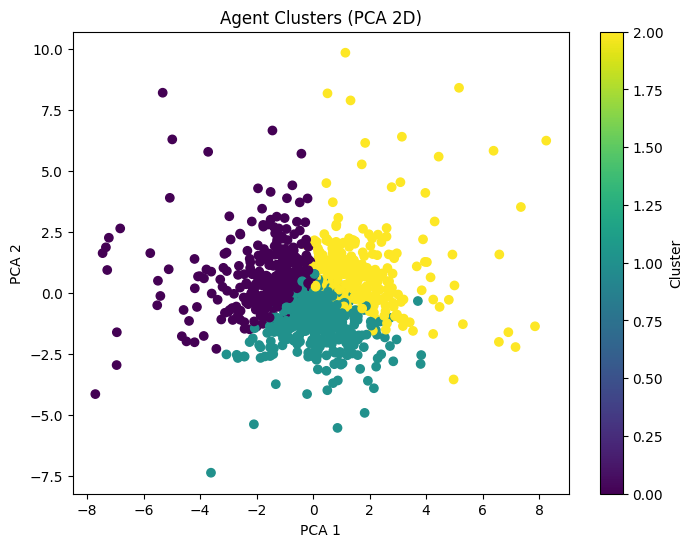

In [335]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=features['performance_cluster'], cmap='viridis')
plt.title('Agent Clusters (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [336]:
agent_summary['performance_cluster'] = kmeans.labels_

In [337]:
agent_summary.groupby('performance_cluster')[[
    'new_policy_count_mean',
    'ANBP_value_mean',
    'net_income_mean',
    'unique_customers_mean',
    'performance_slope',
    'anomaly_count'
]].mean()

,new_policy_count_mean,ANBP_value_mean,net_income_mean,unique_customers_mean,performance_slope,anomaly_count
performance_cluster,,,,,,
0,18.794983,9.156697e+05,205879.110432,14.620783,-0.198428,2.976744
1,19.928698,9.945897e+05,222454.901401,16.402644,-0.102996,3.464789
2,22.790344,1.242403e+06,270152.481874,15.084184,0.110445,2.971888


## Map to Performance Categories

In [338]:
cluster_to_category = {
    2: 'High',
    1: 'Medium',
    0: 'Low'
}

agent_summary['performance_category'] = agent_summary['performance_cluster'].map(cluster_to_category)

In [339]:
agent_summary

,agent_code,agent_age_first,new_policy_count_mean,new_policy_count_sum,ANBP_value_mean,net_income_mean,number_of_policy_holders_last,number_of_cash_payment_policies_mean,unique_proposals_last_7_days_mean,unique_proposals_last_15_days_mean,...,unique_quotations_last_21_days_mean,unique_quotations_mean,unique_customers_last_7_days_mean,unique_customers_last_15_days_mean,unique_customers_last_21_days_mean,unique_customers_mean,performance_slope,anomaly_count,performance_cluster,performance_category
0,003c1999,35,22.40,448,1268787.95,278643.45,54,118.15,1.60,3.20,...,4.90,14.90,2.95,4.80,8.15,15.90,0.427068,5,2,High
1,00d5bda3,48,20.25,405,885509.80,213111.60,15,102.90,1.70,2.90,...,4.35,13.75,2.95,5.55,6.85,15.35,-0.181203,4,2,High
2,012a3553,25,18.10,362,944373.70,204776.35,0,91.15,1.50,2.95,...,4.25,13.90,3.30,5.65,6.80,15.75,0.436090,4,0,Low
3,012f0e15,31,19.65,393,875913.10,225369.70,15,96.10,1.80,3.30,...,4.70,13.80,2.90,4.65,8.00,15.55,0.272932,2,1,Medium
4,0177ed5f,46,21.25,425,1067276.60,229649.50,6,85.55,1.25,3.05,...,4.95,13.35,2.60,4.85,7.70,15.15,-0.125564,4,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,ff8edcc9,56,21.40,428,1168878.25,246696.85,48,90.95,1.60,3.20,...,4.50,13.20,2.80,4.35,7.65,14.80,0.067669,5,2,High
901,ff955d18,54,13.00,26,1160614.00,333061.50,68,91.00,0.50,5.00,...,7.00,20.50,2.00,3.50,10.50,16.00,-26.000000,0,1,Medium
902,ffca3177,52,20.65,413,1211548.65,225084.95,57,125.15,1.80,2.40,...,5.35,14.60,3.25,3.95,8.75,15.95,0.367669,6,1,Medium
903,ffe6c9e9,54,19.55,391,835692.15,212448.80,44,111.80,1.35,2.35,...,4.30,13.55,2.70,4.35,6.25,13.30,0.095489,5,0,Low


In [340]:
# agent_summary[['agent_code', 'cluster']].to_csv('agent_clusters.csv', index=False)

# Intervention Strategies
Assigning personalized intervention strategies to support agent improvement, based on performance categories.

In [341]:
intervention_map = {
    'Low': 'Assign mentor, weekly check-ins, product training sessions',
    'Medium': 'Set monthly targets, provide feedback, soft-skill coaching',
    'High': 'Reward with bonuses, involve in mentoring, assign leadership roles'
}

agent_summary['intervention_strategy'] = agent_summary['performance_category'].map(intervention_map)

In [342]:
agent_summary

,agent_code,agent_age_first,new_policy_count_mean,new_policy_count_sum,ANBP_value_mean,net_income_mean,number_of_policy_holders_last,number_of_cash_payment_policies_mean,unique_proposals_last_7_days_mean,unique_proposals_last_15_days_mean,...,unique_quotations_mean,unique_customers_last_7_days_mean,unique_customers_last_15_days_mean,unique_customers_last_21_days_mean,unique_customers_mean,performance_slope,anomaly_count,performance_cluster,performance_category,intervention_strategy
0,003c1999,35,22.40,448,1268787.95,278643.45,54,118.15,1.60,3.20,...,14.90,2.95,4.80,8.15,15.90,0.427068,5,2,High,"Reward with bonuses, involve in mentoring, ass..."
1,00d5bda3,48,20.25,405,885509.80,213111.60,15,102.90,1.70,2.90,...,13.75,2.95,5.55,6.85,15.35,-0.181203,4,2,High,"Reward with bonuses, involve in mentoring, ass..."
2,012a3553,25,18.10,362,944373.70,204776.35,0,91.15,1.50,2.95,...,13.90,3.30,5.65,6.80,15.75,0.436090,4,0,Low,"Assign mentor, weekly check-ins, product train..."
3,012f0e15,31,19.65,393,875913.10,225369.70,15,96.10,1.80,3.30,...,13.80,2.90,4.65,8.00,15.55,0.272932,2,1,Medium,"Set monthly targets, provide feedback, soft-sk..."
4,0177ed5f,46,21.25,425,1067276.60,229649.50,6,85.55,1.25,3.05,...,13.35,2.60,4.85,7.70,15.15,-0.125564,4,0,Low,"Assign mentor, weekly check-ins, product train..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,ff8edcc9,56,21.40,428,1168878.25,246696.85,48,90.95,1.60,3.20,...,13.20,2.80,4.35,7.65,14.80,0.067669,5,2,High,"Reward with bonuses, involve in mentoring, ass..."
901,ff955d18,54,13.00,26,1160614.00,333061.50,68,91.00,0.50,5.00,...,20.50,2.00,3.50,10.50,16.00,-26.000000,0,1,Medium,"Set monthly targets, provide feedback, soft-sk..."
902,ffca3177,52,20.65,413,1211548.65,225084.95,57,125.15,1.80,2.40,...,14.60,3.25,3.95,8.75,15.95,0.367669,6,1,Medium,"Set monthly targets, provide feedback, soft-sk..."
903,ffe6c9e9,54,19.55,391,835692.15,212448.80,44,111.80,1.35,2.35,...,13.55,2.70,4.35,6.25,13.30,0.095489,5,0,Low,"Assign mentor, weekly check-ins, product train..."


# Progress Tracking
To monitor agent progress over time, we can implement four types of performance tracking.

## Visual Tracker: Per Agent Plot
The visual tracker currently plots each agent’s performance over time based on previous data. This code can be reused in the future to monitor progress and evaluate the impact of interventions.



In [343]:
import matplotlib.pyplot as plt
import os

# Create a folder to save plots (optional)
os.makedirs('agent_progress_plots', exist_ok=True)

# Loop over all unique agent codes
for agent_code in train['agent_code'].unique():
    # Filter and sort that agent's monthly records
    agent_data = train[train['agent_code'] == agent_code].sort_values('year_month')
    
    # Create the plot
    plt.figure(figsize=(8, 4))
    plt.plot(agent_data['year_month'], agent_data['new_policy_count'], marker='o', label='New Policies')
    plt.title(f"Policy Sales Over Time - Agent {agent_code}")
    plt.xlabel("Month")
    plt.ylabel("New Policies Sold")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    
    # Save the plot as a PNG file
    plt.savefig(f"agent_progress_plots/{agent_code}_progress.png")
    plt.close()  # Close the figure to avoid memory overload

## Performance Slope Tracker 

The performance slope calculates the trend of each agent’s monthly policy sales using linear regression.

	slope > 0 → improving agent
	slope < 0 → declining agent
	slope ≈ 0 → stable agent

In [344]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Create a list to store slope values
performance_slopes = []

# Loop through each agent
for agent, group in train.groupby('agent_code'):
    group = group.sort_values('year_month')  # ensure chronological order
    
    # X: time steps (0, 1, 2, ...)
    X = np.arange(len(group)).reshape(-1, 1)
    
    # y: new_policy_count values
    y = group['new_policy_count'].values
    
    # Only compute if there are at least 2 data points
    if len(y) >= 2:
        model = LinearRegression()
        model.fit(X, y)
        slope = model.coef_[0]
    else:
        slope = 0  # or np.nan if you prefer

    performance_slopes.append({'agent_code': agent, 'performance_slope': slope})

# Convert to DataFrame and merge with agent_summary
slope_df = pd.DataFrame(performance_slopes)
agent_summary = agent_summary.merge(slope_df, on='agent_code')

## Categorical Progress Summary
Each agent’s performance slope is categorized into trends such as Improving, Stable, or Declining, making progress tracking more interpretable.

In [345]:
def get_trend_label(slope):
    if slope > 0.5:
        return 'Strongly Improving'
    elif slope > 0.1:
        return 'Improving'
    elif slope < -0.5:
        return 'Strongly Declining'
    elif slope < -0.1:
        return 'Declining'
    else:
        return 'Stable'

agent_summary['progress_trend'] = agent_summary['performance_slope'].apply(get_trend_label)

## Visual Tracker: Category-Level Trend Plot
This plot shows how the average monthly performance of each agent group (High, Medium, Low) changes over time, helping assess if interventions are working.

In [346]:
# Merge performance category back to monthly dataset
train = train.merge(agent_summary[['agent_code', 'performance_category']], on='agent_code')

# Compute average monthly policy count per category
category_trend = train.groupby(['year_month', 'performance_category'])['new_policy_count'].mean().unstack()

# Plot the trend
category_trend.plot(figsize=(10, 5), marker='o')
plt.title("Average Policy Sales Over Time by Performance Category")
plt.xlabel("Month")
plt.ylabel("Average Policies Sold")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()